In [168]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

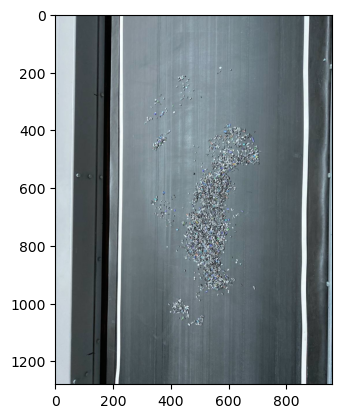

In [218]:
image = cv2.imread('msg1033807294-27153.jpg')
plt.imshow(image)
plt.show()

In [219]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

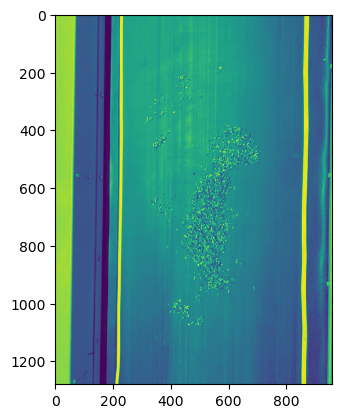

In [220]:
plt.imshow(gray_image)
plt.show()

In [221]:
print(gray_image.shape)
height = gray_image.shape[0]
width = gray_image.shape[1]

(1280, 960)


In [228]:
region_of_interest_vertices = [
    (0.2 * width,height),
    (0.2 * width, 0.15*height),
    (0.95 * width, 0.15*height),
    (0.95 * width, height)
]

In [229]:
def ROI(img, vertices):
    mask = np.zeros_like(img)
    #channel_count = img.shape[2]
    match_mask_color = 255
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_img = cv2.bitwise_and(img, mask)
    return masked_img

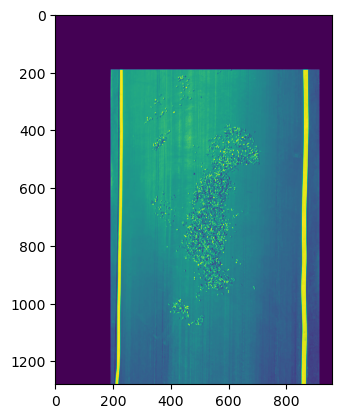

In [230]:
crop_image = ROI(gray_image, np.array([region_of_interest_vertices], np.int32), )
plt.imshow(crop_image)
plt.show()

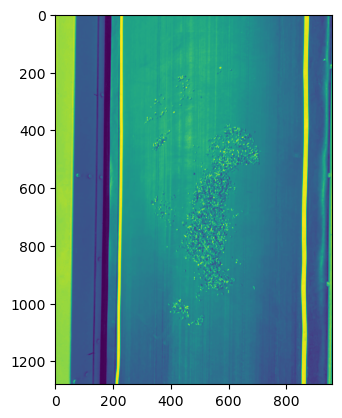

In [231]:
#gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
blurred = cv2.GaussianBlur(gray_image, (5, 5), 0)
#canny_image = cv2.Canny(blurred, 140, 150)
plt.imshow(blurred)
plt.show()

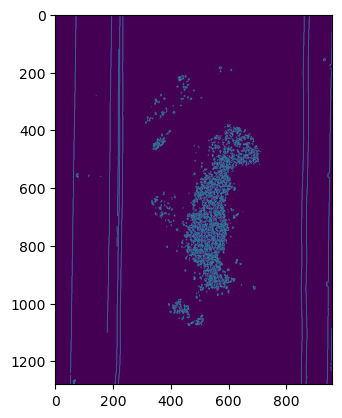

In [239]:
canny_image = cv2.Canny(blurred, 200, 220)
plt.imshow(canny_image)
plt.show()

In [240]:
crop_image1 = ROI(canny_image, np.array([region_of_interest_vertices], np.int32), )

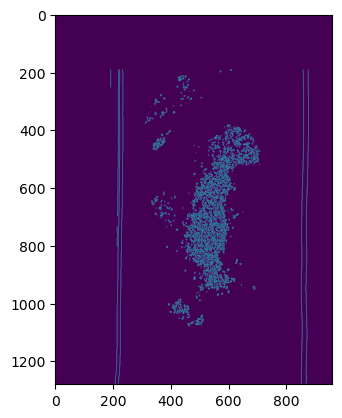

In [241]:
plt.imshow(crop_image1)
plt.show()

In [242]:
lines = cv2.HoughLines(crop_image1, 1, np.pi / 180, threshold=180)

In [243]:
result_image = image.copy()

In [250]:
if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(result_image, (x1, y1), (x2, y2), (255, 0, 0), 2)
        

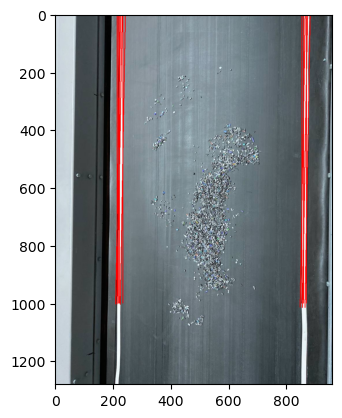

In [251]:
plt.imshow(result_image)
plt.show()